In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [ ]:
!wget --no-check-certificate \https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-14 13:16:55--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.64MB/s    in 40s     

2020-07-14 13:17:36 (7.64 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors'

In [ ]:
os.listdir(base_dir)

['paper', 'rps-cv-images', 'scissors', 'rock', 'README_rpc-cv-images.txt']

In [ ]:
import shutil 
# File txt 
file = 'README_rpc-cv-images.txt'

# folder 
dir = 'rps-cv-images'
  
# Hapus file 'README_rpc-cv-images.txt' dari folder  rockpaperscissors
hapusteks = os.path.join(base_dir, file) 

# Hapus directory 'rps-cv-images' dari folder rockpaperscissors
path = os.path.join(base_dir, dir)

os.remove(hapusteks)
shutil.rmtree(path) 
os.listdir(base_dir)

['paper', 'scissors', 'rock']

In [ ]:
batch_size = 32
IMG_HEIGHT = 150
IMG_WIDTH = 150
epochs = 10

In [ ]:
# menggunakan data augmentation horizontal flip, vertical flip, width shift range, height shift range, dan brightness range
image_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=.15,
    height_shift_range=.15,
    brightness_range=(0.1,0.9),
    validation_split=0.2
    )
train_data_gen = image_generator.flow_from_directory(
    directory=base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical',
    shuffle=True
    )
val_data_gen = image_generator.flow_from_directory(
    directory=base_dir,
    subset='validation',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
    )

num_class = val_data_gen.num_classes

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [ ]:
model = Sequential([
   Conv2D(32,3,activation='relu',padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
   MaxPooling2D(),
   Conv2D(64,3, activation='relu', padding='same'),
   MaxPooling2D(),
   Conv2D(128,3, activation='relu', padding='same',),
   MaxPooling2D(),
   Conv2D(128,3, activation='relu', padding='same',),
   MaxPooling2D(),
   Dropout(0.2),
   Flatten(),
   Dense(512, activation='relu'),
   Dense(num_class, activation='softmax')

])        

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       1

In [ ]:
# menggunakan optimizer Adadelta dengan learning rate 0.5 dan loss categorical crossentropy
model.compile(
    optimizer= tf.keras.optimizers.Adadelta(learning_rate=0.5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
akurasi = model.fit(
    train_data_gen,
    steps_per_epoch=1751 // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps= 437 // batch_size,
    verbose=1
)

Epoch 1/10
54/54 [==============================] - 106s 2s/step - loss: 1.0699 - accuracy: 0.4218 - val_loss: 0.9254 - val_accuracy: 0.6466
Epoch 2/10
54/54 [==============================] - 105s 2s/step - loss: 0.9206 - accuracy: 0.5980 - val_loss: 0.5823 - val_accuracy: 0.8462
Epoch 3/10
54/54 [==============================] - 106s 2s/step - loss: 0.4900 - accuracy: 0.8243 - val_loss: 0.3583 - val_accuracy: 0.8678
Epoch 4/10
54/54 [==============================] - 105s 2s/step - loss: 0.3424 - accuracy: 0.9029 - val_loss: 0.4928 - val_accuracy: 0.8413
Epoch 5/10
54/54 [==============================] - 105s 2s/step - loss: 0.2443 - accuracy: 0.9337 - val_loss: 0.1921 - val_accuracy: 0.9375
Epoch 6/10
54/54 [==============================] - 106s 2s/step - loss: 0.2135 - accuracy: 0.9389 - val_loss: 0.1835 - val_accuracy: 0.9471
Epoch 7/10
54/54 [==============================] - 106s 2s/step - loss: 0.2022 - accuracy: 0.9447 - val_loss: 0.1692 - val_accuracy: 0.9471
Epoch 8/10
54

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from google.colab import files
from keras.preprocessing import image


%matplotlib inline

Using TensorFlow backend.


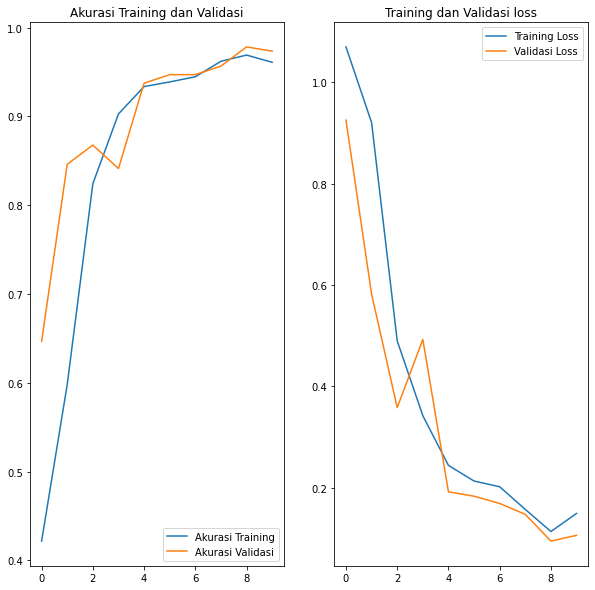

In [ ]:
acc = akurasi.history['accuracy']
val_acc = akurasi.history['val_accuracy']

loss = akurasi.history['loss']
val_loss = akurasi.history['val_loss']

epoch_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.plot(epoch_range, acc, label='Akurasi Training')
plt.plot(epoch_range, val_acc, label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Training dan Validasi')

plt.subplot(1,2,2)
plt.plot(epoch_range, loss, label='Training Loss')
plt.plot(epoch_range, val_loss, label='Validasi Loss')
plt.legend(loc='upper right')
plt.title('Training dan Validasi loss')
plt.show()

Saving 1oKnUgV2CdCaQUUX.png to 1oKnUgV2CdCaQUUX.png
1oKnUgV2CdCaQUUX.png
Prediksinya adalah: paper


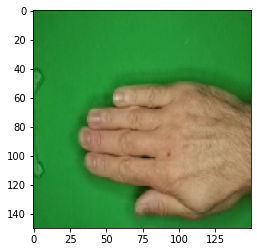

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn 
  img = image.load_img(path, target_size=(IMG_HEIGHT, IMG_WIDTH))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  class_names = ['paper', 'rock', 'scissor']

  print(fn)
  print(f'Prediksinya adalah: {class_names[np.argmax(classes)]}')


Saving 4burI8a7jyfTRBl6.png to 4burI8a7jyfTRBl6.png
4burI8a7jyfTRBl6.png
Prediksinya adalah: scissor


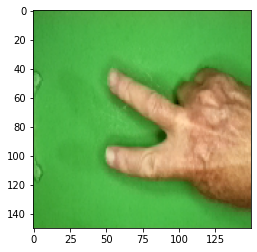

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn 
  img = image.load_img(path, target_size=(IMG_HEIGHT, IMG_WIDTH))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  class_names = ['paper', 'rock', 'scissor']

  print(fn)
  print(f'Prediksinya adalah: {class_names[np.argmax(classes)]}')

Saving 91nHRDpe6EROWOyY.png to 91nHRDpe6EROWOyY (1).png
91nHRDpe6EROWOyY.png
Prediksinya adalah: rock


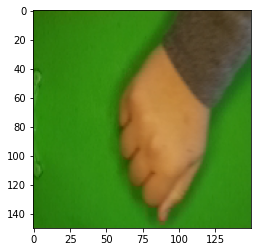

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn 
  img = image.load_img(path, target_size=(IMG_HEIGHT, IMG_WIDTH))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  class_names = ['paper', 'rock', 'scissor']

  print(fn)
  print(f'Prediksinya adalah: {class_names[np.argmax(classes)]}')